<a href="https://colab.research.google.com/github/patty-13/MSML-603-UMD-MACHINE-LEARNING/blob/main/HW8_119344675_PRATYUSH_SETHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 8 (30 points + 10 points bonus)
The goal of this HW is to select the best model that can fit our data. We first generate a set of data. Here you can actually cheat and see how the data is generated. So you already know what your final answer should be. But This problem wants your to actually find the best model by using a systematic approach in finding the best model. 

## Review of bias variance covered in the lecture

**you do not need this section to solve the problem but this helps you to understand the problem**

We consider a regression problem (this can be extended to a classification problem but regression problems are more intuitive for this analysis). 

Consider the training data set
$$
D = \{ ({\bf x}_1, y_1), ({\bf x}_2, y_2), \cdots , ({\bf x}_n, y_n) \}
$$
drawn i.i.d from distribution $P_{{\bf X}, Y} ({\bf x}, y)$, ${\bf x} \in \mathbb{R}^d$, and $y \in \mathbb{R}$. Please note that, in this formulation for each value of ${\bf x}$ you could have multiple (infinite) values $y$ (in other words $y \sim P_{Y | {\bf X}}(y | {\bf x})$ ).

We fix an algorithm $ \mathcal{A} $, given this algorithm and the data set $D$ we find the regression function (or classification function). In other words we have
$$
\mathcal{A}: D \rightarrow h_D(\cdot)
$$
which simply means algorithm $ \mathcal{A} $ acts upon data set $D$ to estimate the  regression function (or classification function) $h_D(\cdot)$. 

One important fact that you need to remember is that the data set $D$ itself is randomly selected and does not contain the entire data that is availabe in the universe. So this data set itself is a random variable (random set here) with certain probability $Pr (D)$.

Using this formulation after some manipulation we get
$$
\underbrace{E_{{\bf X}, Y, D} \left [ \left ( h_D({\bf x}) - y \right )^2 \right ]}_{\text{ Expected Test Error} } = 
\underbrace{E_{{\bf X},  D} \left [ \left ( h_D({\bf x}) - {\bar h}_D ({\bf x})\right )^2\right ]}_{\text{ Variance} } +
\underbrace{E_{{\bf X}} \left [ \left ( {\bar h}_D ({\bf x}) - {\bar y}({\bf x}) \right )^2 \right ]}_{\text{ Bias}^2 } +
\underbrace{E_{{\bf X}, Y} \left [ \left ( {\bar y}({\bf x}) - y \right )^2 \right ]}_{\text{ Noise} }
$$

Where 
$$
{\bar y}({\bf x}) = E_{Y|{\bf X}}\left [Y \right ] = \int_y y P_{Y | {\bf X}}(y | {\bf x}) dy 
$$

is the expected value of y given the feature vector ${\bf x}$. In practice if you do not have access to $P_{Y | {\bf X}}(y | {\bf x})$, then instead of the integral you find the sample average as follows

$$
\hat{\bar{y}}({\bf x}) = \frac{1}{N}\sum_{i = 1}^N y_i ~I({\bf x} ={\bf x}_i)
$$
where 
$$
I({\bf x} ={\bf x}_i) = \begin{cases}
            1, &         \text{if } {\bf x}= {\bf x}_i,\\
            0, &         \text{if } {\bf x} \neq {\bf x}_i.
    \end{cases}
$$
This means, taking average over $y_i$ of all data points that have the same feature vector. Again in practice if the feature vectors are not exactly the same, you can define the histogram of the data and modify the above equation as follows:
$$
\hat{\bar{y}}({\bf x}) = \frac{1}{N}\sum_{i = 1}^N y_i ~ {I}({\bf x} \approx{\bf x}_i)
$$
where 
$$
\tilde{I}({\bf x} \approx{\bf x}_i) = \begin{cases}
            1, &         \text{if } {\bf x}~ \text{and} ~{\bf x}_i \text{ belong to the same histogram bin}\\
            0, &         \text{otherwise}.
    \end{cases}
$$

We define ${\bar h}_D ({\bf x})$ as follows
$$
{\bar h}_D(\cdot) = E_{D}\left [ h_D(\cdot) \right ] = \int_y h_D(\cdot)Pr(D) dD 
$$
which is averaging the regression function over all possible training data sets that can be provided. You can imagine that each company/organization has access to a training data that is different from the other (for example patients' data  in Harvard vs paitents' data  Georgetown), however they are all looking at a certain type of cancer and use the same algorithm,  so each oraginzation finds a different regression function but at the end if they collaborate they can find the average of all these regression functions. 

# we generate the entire data set here.


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(123)
N = 1000
b = 0
a4 =-0.009
a3 = .05
a2 = .01
a1 = 1
x = np.random.normal(0, 3, N)
p = 4
X = np.ones(N)
for i in np.arange(p):
  X = np.vstack((X, np.power(x , i+1)))
w = np.array([b, a1, a2, a3, a4])
y = np.matmul(w,X) + np.random.normal(0, 10, N)

**We set aside 50% of the data for test**


Text(0.5, 1.0, 'training and test data ')

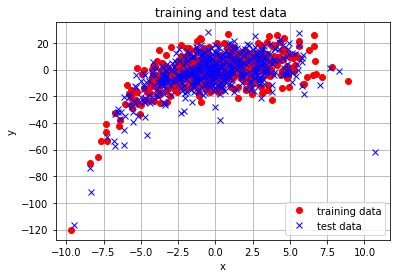

In [ ]:
N_tr = int(N*0.5)
N_tst = N-N_tr
x_tr = x[0:N_tr]
y_tr = y[0:N_tr]
x_tst= x[N_tr:]
y_tst = y[N_tr:]
plt.plot(x_tr,y_tr, 'ro', label='training data')
plt.plot(x_tst,y_tst, 'bx', label='test data')
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('training and test data ')

# Problem 1 (15points)

Using the data set that is generated above solve the nonlinear regression for polynomial degrees from 1 to 12. Then plot the training error and test error as a function of the degree of the polynomial in your model.

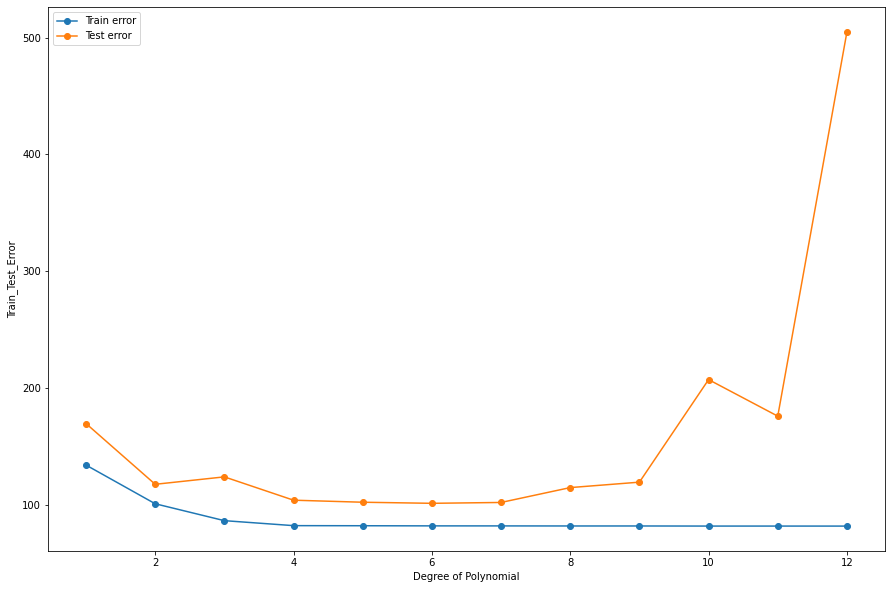

 
BEST FIT POLYNOMIAL DEGREE:  6
 
DATAFRAME TRAIN TEST ERROR WITH DEGREE


,degree,Train_Error,Test_Error
0,1,134.094935,169.637881
1,2,100.990139,117.652284
2,3,86.528104,124.008212
3,4,82.265956,104.047620
4,5,82.183510,102.299904
5,6,82.066071,101.375030
6,7,82.041064,102.107034
7,8,81.983931,114.833995
8,9,81.983351,119.482466
9,10,81.899115,207.253868


In [ ]:
# SOLUTION 1

NUM_MODELS = 12
degree = [1,2,3,4,5,6,7,8,9,10,11,12]
fig, axs = plt.subplots(1, figsize = (15,10))
E_train = []
E_test = []

for i in range(1,13):
  ###############################################################
  # TRANSFORMING DATA INTO HIGHER DEGREE POLYNOMIAL DATA
  x_poly = 0 ; w =0
  x_poly = np.array([np.power(x_tr,p) for p in range(i+1)])
  w = np.matmul(np.linalg.inv(np.matmul(x_poly, np.transpose(x_poly))) , np.matmul(x_poly,y_tr))
  # x_min, x_max = np.min(x_tr), np.max(x_tr)
  # xx = np.linspace(x_min, x_max, 1000)
  # temp = i
  # yy = w[0]
  
  # while(temp!=0):
  #   yy += w[temp]*xx**temp
  #   temp -=1

  ##################################################################
  # CALCULATING TRAIN ERROR AND TEST ERROR
  X_tr = x_poly
  X_tst = np.array([np.power(x_tst,p) for p in range(i+1)])

  training_error = np.mean(np.square(np.matmul(w, X_tr) - y_tr))
  E_train.append(training_error)

  test_error = np.mean(np.square(np.matmul(w, X_tst) - y_tst))
  E_test.append(test_error)
  ##################################################################  

# DISPLAYING THE GRAPH 
print(" ")
plt.plot(degree, E_train, marker='o')
plt.plot(degree,E_test, marker='o')
plt.legend(['Train error', 'Test error'])
plt.xlabel('Degree of Polynomial')
plt.ylabel('Train_Test_Error')
plt.show()
print(" ")

# BEST FIT POLYNOMIAL DEGREE
print("BEST FIT POLYNOMIAL DEGREE: ", E_test.index(min(E_test))+1)
print(" ")

# DISPLAYING THE DATA TABLE
print("DATAFRAME TRAIN TEST ERROR WITH DEGREE")
d = {'degree': [1,2,3,4,5,6,7,8,9,10,11,12],'Train_Error': E_train, 'Test_Error': E_test}
df = pd.DataFrame(data = d)
df


# Problem 2 (5 points)

Use your plot to identify the high variance and the high bias area. 

In [ ]:
'''
As we move from LEFT to RIGHT (FROM DEGREE 1 TO 12) we see a trend where for 1 and 2 degree polynomial 
we have high train and test error which depicts that we have high bias and the models
is underfitting, this can be said for 3rd aswell. As we are moving from 4th degree polynomial to 9th
we are in a partially sweet spot, with each degree performing better till the 7th so we can say 
from 4th to 7th we are partially in sweet spot, low train error but slightly high test error.
As we move from 8th degree polynomial to 12 we see a trend in increase test error which shows that model is 
having high variance, and the model is overfitting.
Degree | NOTES
1 - 3 :[High Bias, due to high train and test error, this is underfitting, bias- (What is the inherent error that you obtain
       from your classifier even with infinite training data, This is due to the classifier being biased to a particular
       data points.)]
4 - 7 :[These degrees are in partially sweet spot, between high Bias and High variance, 
       we cannot completely say low bias and low varaince but are better than the rest of
       the degrees]
8 - 12:[High variance, occurs when we have high test error and low training error, Variance (This depcits how overspecialized is 
        the classifier to a particular training set (overfitting))
        ]
Note: The test MSE intially decreases as we increase the flexibilty of the model but eventually 
      starts to increases again after we introduce a lot flexibilty in this case increasing the 
      features by increasing the degree. so the model starts to fit the patten in the training data
      and as we introduce test data or unseen data the model cannot generalize these patterns,hence
      overfitting on the training data.
      For High Bias as we are moving from 1 Degree polynomial there are not even features or patterns
      so we can say less flexibility, and hence the model cannot generalize the patterns on the 
      TRAINING DATA hence performing bad on test data leading to underfitting.
'''

# Problem 3 (5 points)

What polynomial degree do you use for modeling the data? We all know 4 is the correct one but you need to give a reasonable answer justifying your answer as if you did not know how the data was generated.

In [ ]:
'''
According to the Result the 6th polynomial degree works best for modelling the data
-> Test error is the lowest among all the degrees, which shows
   that the regressor is fitting more data points correctly (not all correctly but in comparision with 
   the rest of the degree's it is performing better.) and on testing it on test data it shows that model doesnt overfit 
   on the train data. That means, when there is new pattern, the polynomial regressor, can predict well 
   in respect to other degree beacuse it didnt overfit on the training data as well as didnt underfit, where
   it cannot recognize the points even in the training due to lack of flexibility, as in this case the features
   which increases with increase in degree of the polynomial.
'''

# Problem 4 (5 points) 

The test error does not get close to zero even for the best polynomial choice. Please give a reason for this. 



In [ ]:
'''
The test error doesnt get close to zero even for the best polynomial choice
is because when we increase the degree of the polynomial we are increasing 
the features as well, so that the regressor can get more flexibility to train
on training data, keeping in mind that it doesnt overfit too. But when we 
add more features, it inculdes more noise to the data as well. Moreover, 
for n predictors, the equation includes all the possible combinations of 
different order polynomials. But, there is a major issue with multi-dimensional
Polynomial Regression- multicolinearity (which the interdependence between the predictors
in a multiple dimensional which restricts the model from fitting properly on the dataset.)
Thus, when tested on new data or test data, there is still chances of error and hence the
test error does not get close to zero.
'''

# Bonus Problem (10 points)

 Write a code that  calculates ${\bar y}({\bf x}) $ and the noise component of the equation 
 $$
\underbrace{E_{{\bf X}, Y, D} \left [ \left ( h_D({\bf x}) - y \right )^2 \right ]}_{\text{ Expected Test Error} } = 
\underbrace{E_{{\bf X},  D} \left [ \left ( h_D({\bf x}) - {\bar h}_D ({\bf x})\right )^2\right ]}_{\text{ Variance} } +
\underbrace{E_{{\bf X}} \left [ \left ( {\bar h}_D ({\bf x}) - {\bar y}({\bf x}) \right )^2 \right ]}_{\text{ Bias}^2 } +
\underbrace{E_{{\bf X}, Y} \left [ \left ( {\bar y}({\bf x}) - y \right )^2 \right ]}_{\text{ Noise} }
$$

In [ ]:
NUM_MODELS = 12
E_train = []
E_test = []
E_var = []
E_bias = []
E_noise = []

for i in range(1,13):
  ###############################################################
  # TRANSFORMING DATA INTO HIGHER DEGREE POLYNOMIAL DATA
  t = i
  x_poly = 0 ; w =0
  x_poly = np.array([np.power(x_tr,p) for p in range(i+1)])
  w = np.matmul(np.linalg.inv(np.matmul(x_poly, np.transpose(x_poly))) , np.matmul(x_poly,y_tr))
  

  ##################################################################
  # CALCULATING TRAIN ERROR AND TEST ERROR
  X_tr = x_poly
  X_tst = np.array([np.power(x_tst,p) for p in range(i+1)])

  training_error = np.mean(np.square(np.matmul(w, X_tr) - y_tr))
  E_train.append(training_error)

  test_error = np.mean(np.square(np.matmul(w, X_tst) - y_tst))
  E_test.append(test_error)

  ##################################################################  
# mean_pred_Test = y¯(x) it calculates mean of labels.

  y_pred = np.matmul(w, X_tst)
  df["Model"+(str)(t)] = y_pred
 
mean_pred_test = df.mean(axis =1)
df['EY'] = mean_pred_test

####################################################################

# variance
variance = df.apply(lambda df: np.mean(np.square(mean_pred_test - df))).mean()
# Bias_2
bias_2 = np.mean(np.square(y_pred - mean_pred_test))
# Noise
noise = np.mean(np.square(y_tst - mean_pred_test))
print("VARIANCE:", variance)
print("BIAS:",bias_2)
print("NOISE:",noise)

#DATAFRAME
df

VARIANCE: 51.71033430460978
BIAS: 332.89087846881654
NOISE: 105.93939476978228


,Model1,Model2,Model3,Model4,Model5,Model6,Model7,Model8,Model9,Model10,Model11,Model12,EY
0,3.493804,5.050065,1.866365,2.316594,2.101270,1.887828,1.819110,1.599162,1.596680,1.354201,1.363435,1.290829,2.144945
1,-1.030559,3.086550,2.272643,0.958659,0.880122,1.089565,1.027589,1.173289,1.184540,1.344163,1.335815,1.404881,1.227271
2,-3.252230,0.710102,1.548657,0.226398,0.312292,0.526577,0.583751,0.732741,0.721853,0.878774,0.887508,0.960319,0.403062
3,4.670991,4.928496,1.656927,2.755456,2.593926,2.285156,2.291521,2.068307,2.051068,1.930604,1.946884,1.989457,2.597399
4,6.867138,4.003609,1.492594,3.630437,3.672966,3.356197,3.518286,3.512959,3.487168,3.765914,3.769191,3.935776,3.751019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2.716283,4.987147,2.014386,2.048954,1.821132,1.688886,1.585448,1.408004,1.414985,1.165193,1.167093,1.050778,1.922357
496,5.601426,4.647623,1.536855,3.123410,3.033403,2.688341,2.763915,2.599166,2.573726,2.619978,2.635221,2.767184,3.049187
497,-7.521256,-6.467354,-3.328125,-2.995033,-2.775407,-2.954204,-2.863251,-3.075186,-3.076741,-3.337691,-3.345440,-3.441847,-3.765128
498,1.625629,4.706892,2.198858,1.704792,1.488580,1.477351,1.350848,1.267919,1.284352,1.113692,1.105982,0.992502,1.693116
